In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
import seaborn as sns
from sklearn.metrics import accuracy_score,mean_squared_error,classification_report,confusion_matrix,precision_score,recall_score,roc_curve,auc
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

In [6]:
df = pd.read_csv(r'C:\Users\intel\Documents\health care diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [8]:
df.shape

(768, 9)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
#identifying mean of the features
print(df['Glucose'].mean())
print(df['BloodPressure'].mean())
print(df['SkinThickness'].mean())
print(df['Insulin'].mean())

120.89453125
69.10546875
20.536458333333332
79.79947916666667


In [12]:
#finding the rows which has null values
print('Glucose-',len(df['Glucose'][df['Glucose']==0]))
print('BloodPressure-',len(df['BloodPressure'][df['BloodPressure']==0]))
print('SkinThickness-',len(df['SkinThickness'][df['SkinThickness']==0]))
print('Insulin-',len(df['Insulin'][df['Insulin']==0]))

Glucose- 5
BloodPressure- 35
SkinThickness- 227
Insulin- 374


In [13]:
selected_columns = ['Glucose', 'BloodPressure', 'SkinThickness','Insulin']
null_percentage = (df[selected_columns] == 0).mean() * 100

# Displaying the null value percentage for each selected column
print("Percentage of Null Values for Each Column:")
print(null_percentage)

Percentage of Null Values for Each Column:
Glucose           0.651042
BloodPressure     4.557292
SkinThickness    29.557292
Insulin          48.697917
dtype: float64


In [14]:
df['Glucose'] = df['Glucose'].replace([0],[df['Glucose'].mean()])
df['BloodPressure'] = df['BloodPressure'].replace([0],[df['BloodPressure'].mean()])
df['SkinThickness'] = df['SkinThickness'].replace([0],[df['SkinThickness'].mean()])
df['Insulin'] = df['Insulin'].replace([0],[df['Insulin'].mean()])

In [25]:
# Check for missing values (NaN)
print("Missing values in each column:")
print(df.isnull().sum())

# Filling missing values using median (if any column has NaN)
df.fillna(df.median(), inplace=True)


Missing values in each column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [27]:
#Checking the null value percentage of the treated columns
null_percentage_treated = (df[selected_columns] == 0).mean() * 100

# Displaying the null value percentage for each selected column
print("Percentage of Null Values for Each Column after the null value treatment:")
print(null_percentage_treated)

Percentage of Null Values for Each Column after the null value treatment:
Glucose          0.0
BloodPressure    0.0
SkinThickness    0.0
Insulin          0.0
dtype: float64


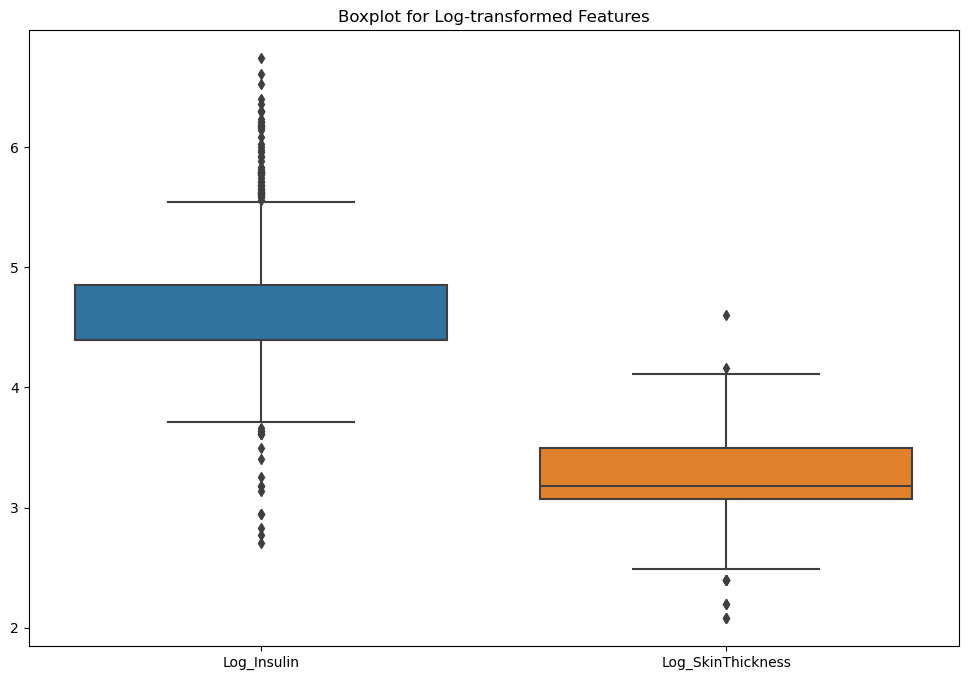

In [29]:
# Apply log transformation to skewed features (adding 1 to avoid log(0))
df['Log_Insulin'] = np.log1p(df['Insulin'])
df['Log_SkinThickness'] = np.log1p(df['SkinThickness'])

# Check the transformation with boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['Log_Insulin', 'Log_SkinThickness']])
plt.title('Boxplot for Log-transformed Features')
plt.show()


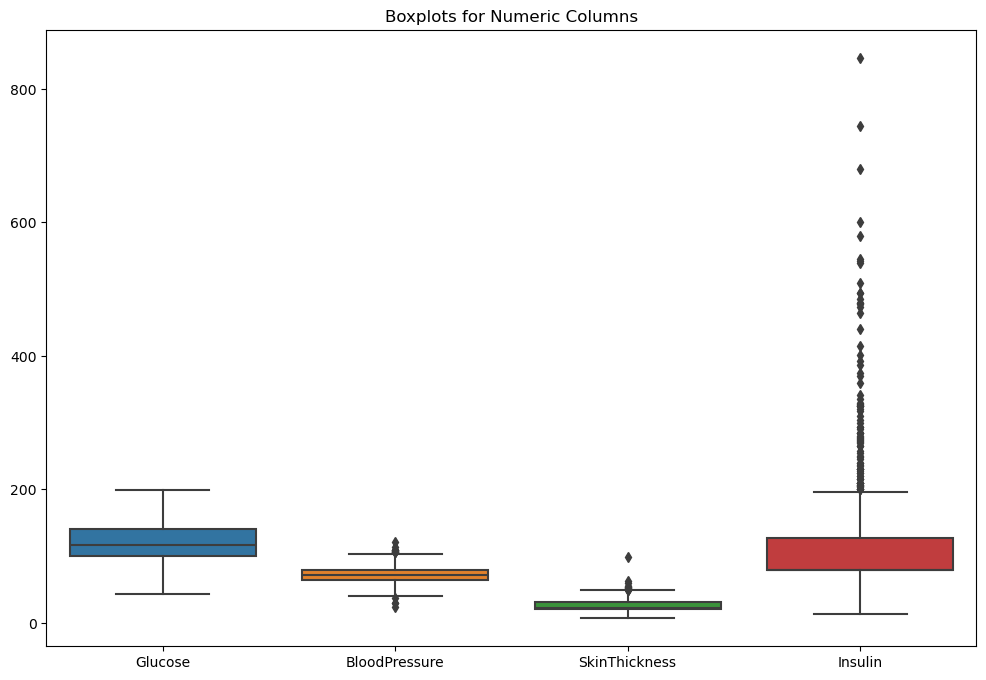

In [30]:
columns=df[selected_columns]
# Display boxplots for numeric columns to visualize outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=columns)
plt.title("Boxplots for Numeric Columns")
plt.show()

In [31]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Log_Insulin,Log_SkinThickness
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,31.992578,0.471876,33.240885,0.348958,4.610766,3.261375
std,3.369578,30.436016,12.115932,9.631241,93.080358,7.884160,0.331329,11.760232,0.476951,0.538832,0.336312
min,0.000000,44.000000,24.000000,7.000000,14.000000,0.000000,0.078000,21.000000,0.000000,2.708050,2.079442
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.300000,0.243750,24.000000,0.000000,4.391971,3.069747
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000,4.391971,3.178054
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000,4.853976,3.496508
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000,6.741701,4.605170


In [33]:
# Finding the Outlier Count in the selected Columns:
def find_outliers_iqr(df, column_name):
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)

    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

    # Count the number of outliers
    count_outliers = len(outliers)

    return count_outliers

# Calculate and print the number of outliers for each column of interest
for column_name in selected_columns:
    outlier_count = find_outliers_iqr(df, column_name)
    print(f"Number of outliers in the '{column_name}' column: {outlier_count}")

Number of outliers in the 'Glucose' column: 0
Number of outliers in the 'BloodPressure' column: 14
Number of outliers in the 'SkinThickness' column: 12
Number of outliers in the 'Insulin' column: 89


In [35]:
sorted(df)
Q1=df.quantile(0.20)
Q3=df.quantile(0.80)
IQR=Q3-Q1
print(IQR)

Pregnancies                  6.000000
Glucose                     52.000000
BloodPressure               20.000000
SkinThickness               14.463542
Insulin                     70.200521
BMI                         11.900000
DiabetesPedigreeFunction     0.467600
Age                         19.600000
Outcome                      1.000000
Log_Insulin                  0.625309
Log_SkinThickness            0.513772
dtype: float64


In [39]:
data_cleared_iqr = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
data_cleared_iqr
print(data_cleared_iqr.shape)
print(df.shape)

(668, 11)
(768, 11)


In [41]:
data_cleared_iqr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Log_Insulin,Log_SkinThickness
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1,4.391971,3.583519
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0,4.391971,3.401197
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1,4.391971,3.069747
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0,4.553877,3.178054
5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0,4.391971,3.069747
...,...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0,5.198497,3.891820
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0,4.391971,3.332205
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0,4.727388,3.178054
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1,4.391971,3.069747


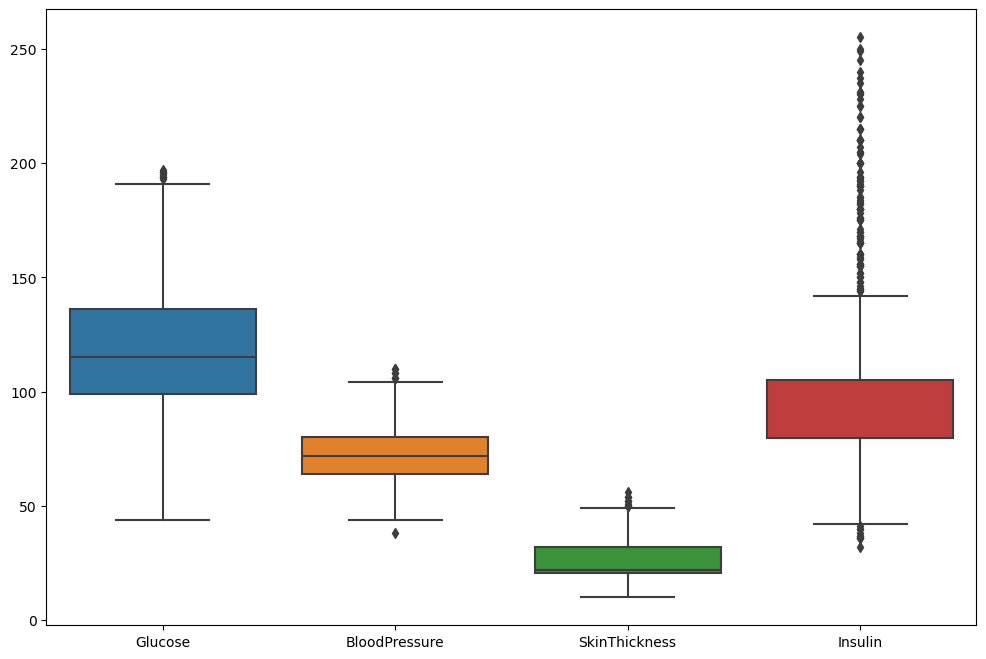

In [43]:
col=data_cleared_iqr[['Glucose','BloodPressure','SkinThickness','Insulin']]

# Checking the outliers after treatment using box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=col)
plt.show()

<Figure size 1200x1000 with 0 Axes>

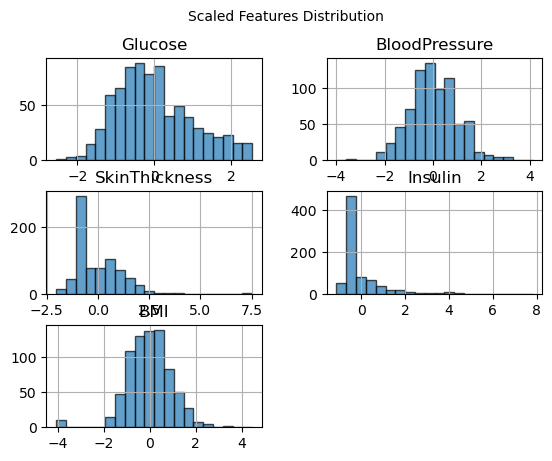

In [44]:
# Standardizing numerical features
scaler = StandardScaler()
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = scaler.fit_transform(df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']])

# Checking the distribution after scaling
plt.figure(figsize=(12, 10))
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].hist(bins=20, edgecolor='black', alpha=0.7)
plt.suptitle('Scaled Features Distribution', fontsize=10)
plt.show()


In [46]:
#EDA - Univariate analysis

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


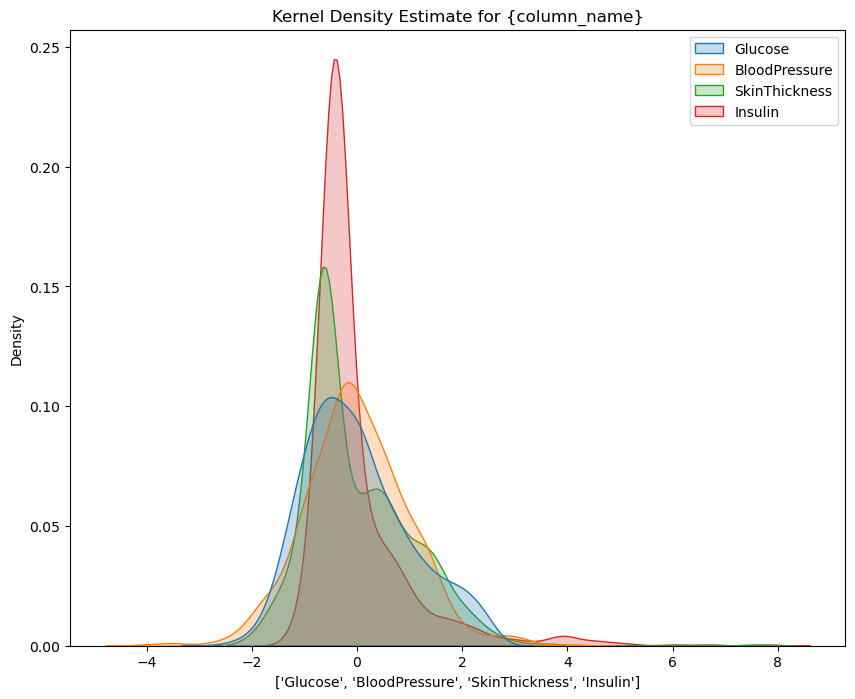

In [47]:
#kernel density estimate
column_name = ['Glucose','BloodPressure','SkinThickness','Insulin']
plt.figure(figsize = (10,8))
sns.kdeplot(df[column_name], fill = True , color = {"red","blue","green","yellow"})
plt.title('Kernel Density Estimate for {column_name}')
plt.xlabel(column_name)
plt.ylabel('Density')
plt.show()

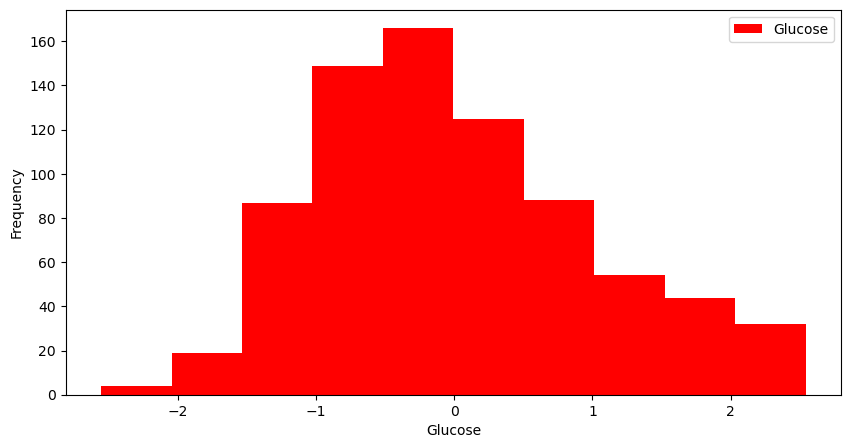

In [48]:
df['Glucose'].plot(kind='hist',figsize=(10,5), color = 'red')
plt.xlabel('Glucose')
plt.legend()
plt.show()

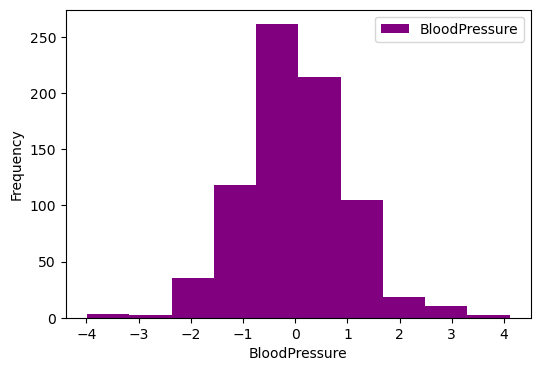

In [51]:
df['BloodPressure'].plot(kind = 'hist',figsize = (6,4) , color = 'purple')
plt.xlabel('BloodPressure')
plt.legend()
plt.show()

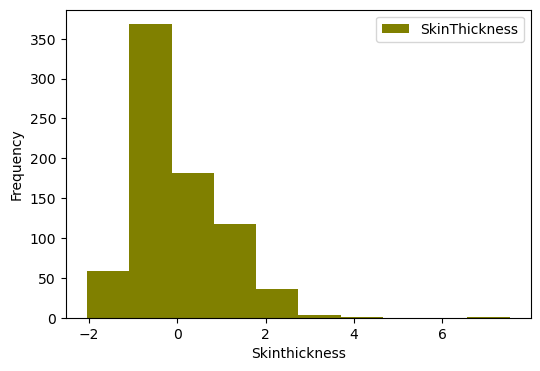

In [52]:
df['SkinThickness'].plot(kind = 'hist',figsize = (6,4) , color = 'olive')
plt.xlabel('Skinthickness')
plt.legend()
plt.show()

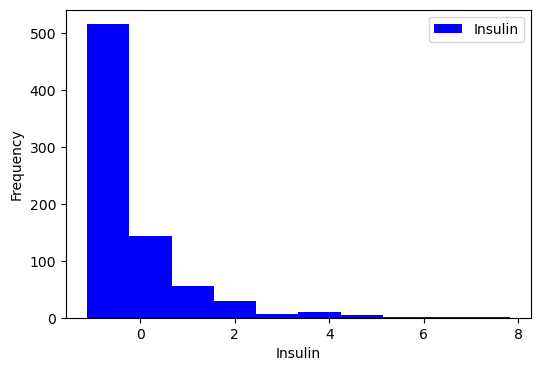

In [55]:
df['Insulin'].plot(kind = 'hist',figsize = (6,4) , color = 'blue')
plt.xlabel('Insulin')
plt.legend()
plt.show()

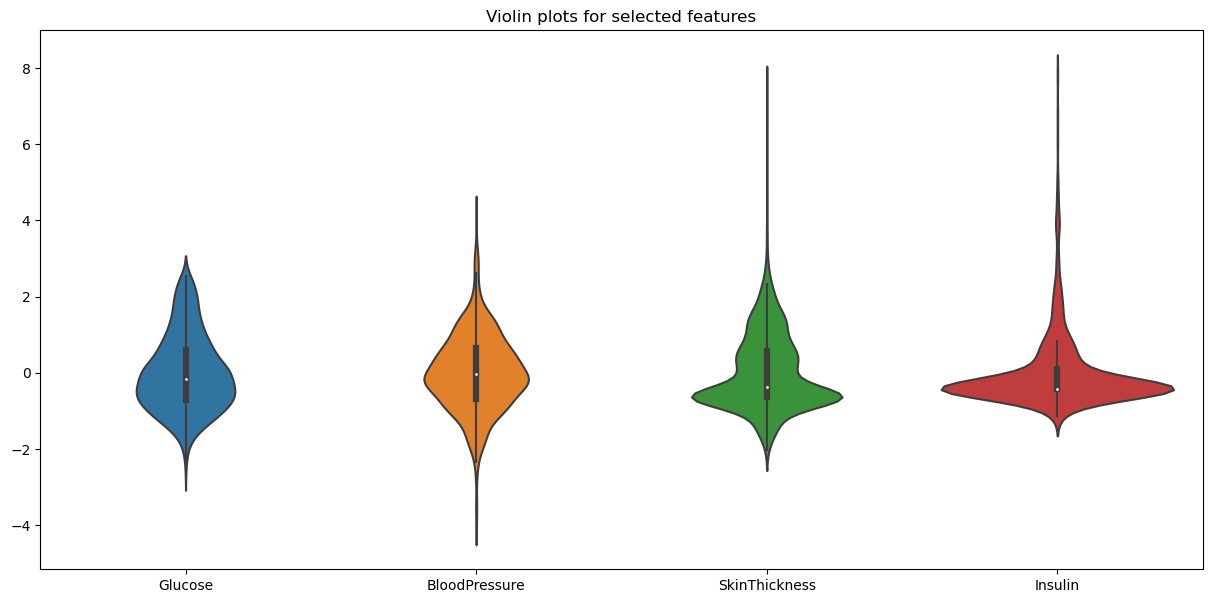

In [56]:
plt.figure(figsize = (15,7))
sns.violinplot(data = df[selected_columns])
plt.title("Violin plots for selected features")
plt.show()

In [67]:
df.dtypes
df.dtypes.value_counts()

float64    8
int64      3
Name: count, dtype: int64

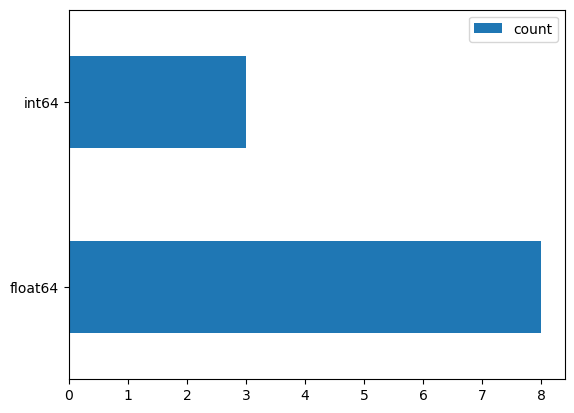

In [93]:
figsize=(10,2)
df.dtypes.value_counts().plot(kind='barh')
plt.legend()
plt.show()

In [95]:
df['Outcome'].value_counts()


Outcome
0    500
1    268
Name: count, dtype: int64

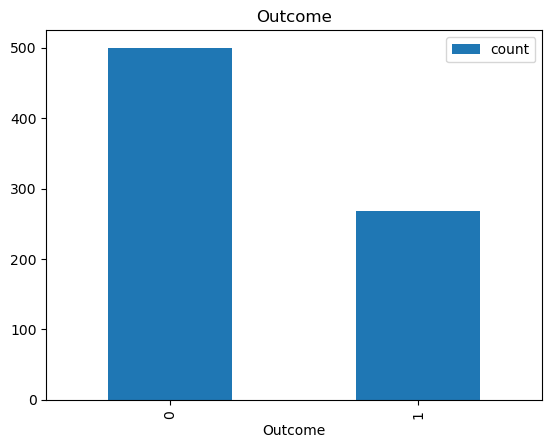

In [79]:
df['Outcome'].value_counts().plot(kind='bar')
plt.legend()
plt.title('Outcome')
plt.show()

In [97]:
outcome=(df['Outcome'].value_counts()/df['Outcome'].shape)*100
outcome

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

In [99]:
balanced_data=100-outcome
balanced_data

Outcome
0    34.895833
1    65.104167
Name: count, dtype: float64

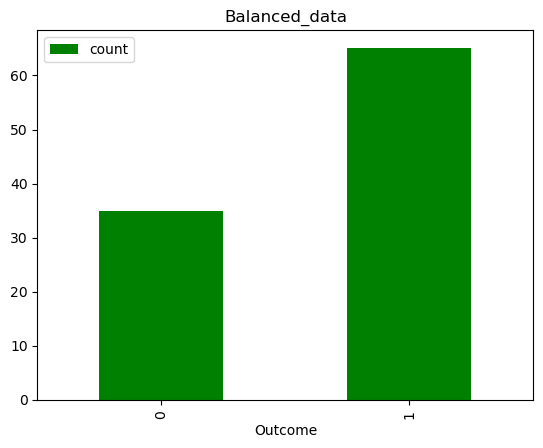

In [132]:
balanced_data.plot(kind='bar' , color = 'green')
plt.legend()
plt.title('Balanced_data')
plt.show()

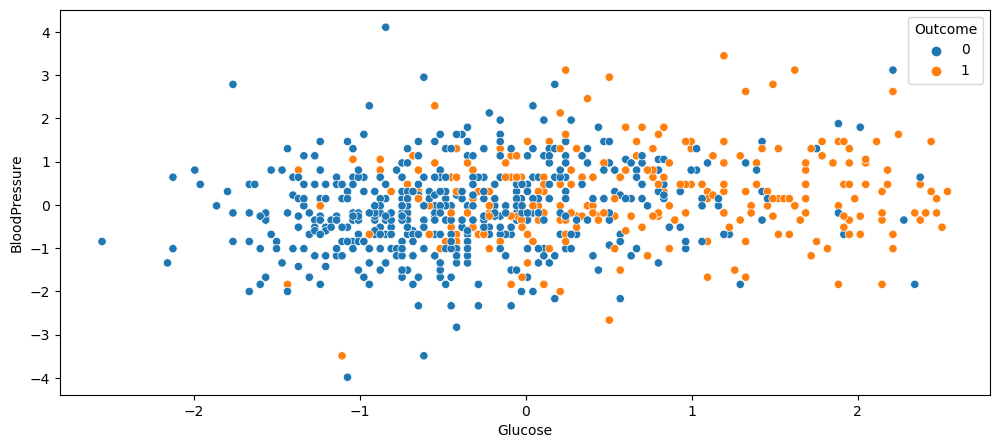

In [134]:
plt.figure(figsize=(12,5))
sns.scatterplot(x = 'Glucose', y = 'BloodPressure',hue='Outcome',data = df)
plt.show()

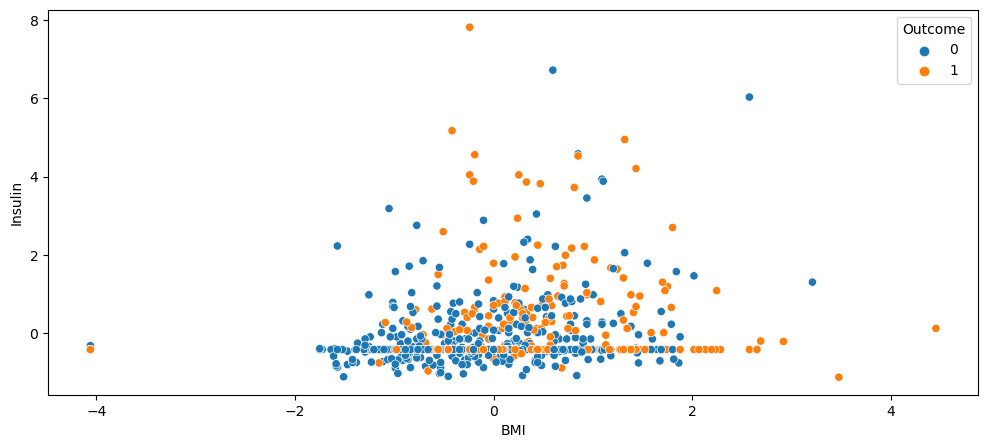

In [136]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='BMI',y='Insulin',hue='Outcome',data=df)
plt.show()

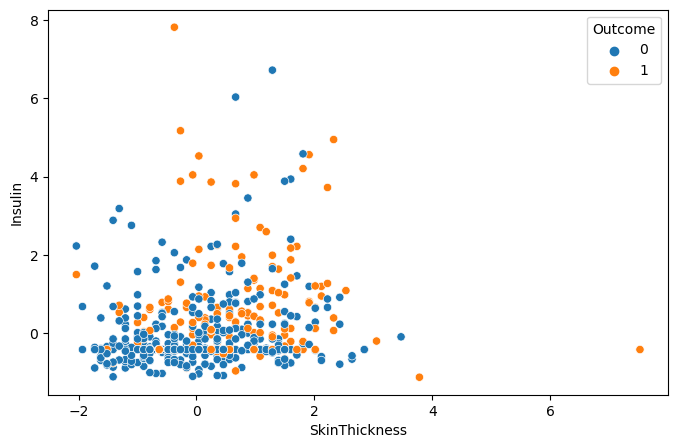

In [138]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='SkinThickness',y='Insulin',hue='Outcome',data=df)
plt.show()

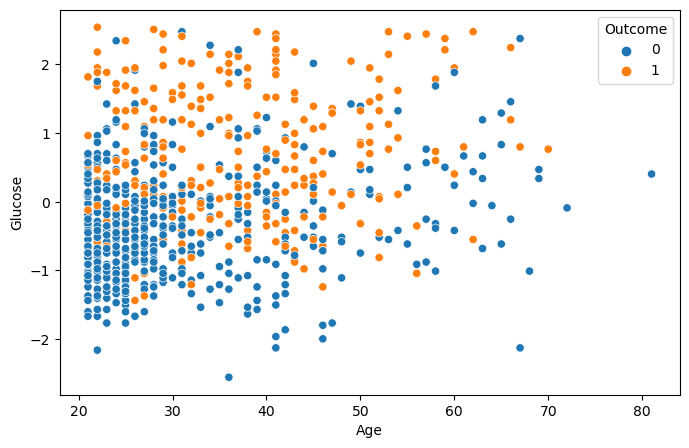

In [140]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Age',y='Glucose',hue='Outcome',data=df)
plt.show()

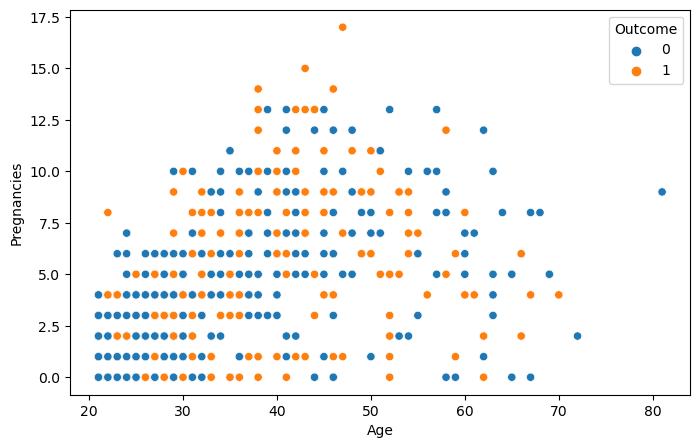

In [142]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Age',y='Pregnancies',hue='Outcome',data=df)
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

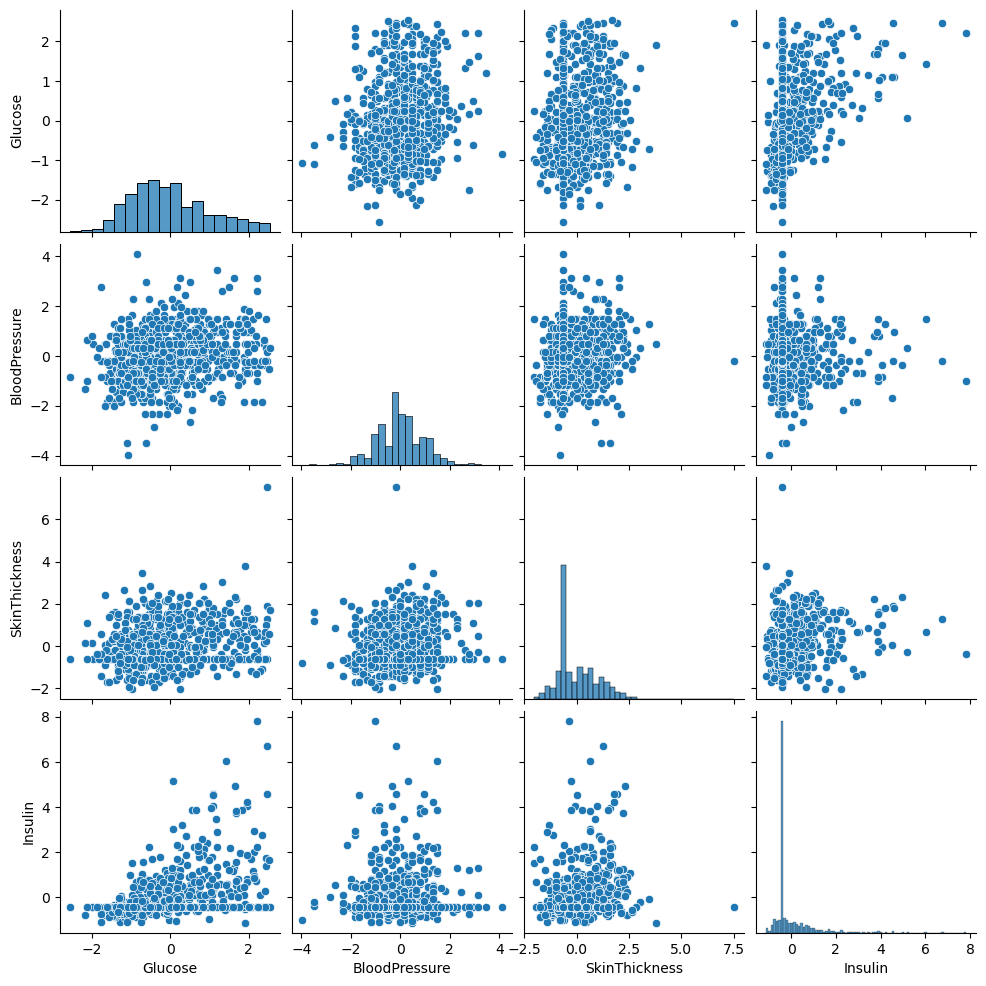

In [146]:
sns.pairplot(df[['Glucose','BloodPressure','SkinThickness','Insulin']])
plt.show()

In [150]:
correlation = df[['Age', 'Pregnancies']].corr(method='pearson')  # Pearson correlation
print(correlation)

                  Age  Pregnancies
Age          1.000000     0.544341
Pregnancies  0.544341     1.000000


In [152]:
correlation = df[['Glucose', 'Insulin']].corr(method='pearson') 
print(correlation)

          Glucose   Insulin
Glucose  1.000000  0.396597
Insulin  0.396597  1.000000


In [154]:
correlation = df[['BloodPressure', 'Insulin']].corr(method='pearson') 
print(correlation)

               BloodPressure   Insulin
BloodPressure       1.000000  0.010926
Insulin             0.010926  1.000000


In [156]:
correlation = df[['BloodPressure', 'SkinThickness']].corr(method='pearson') 
print(correlation)

               BloodPressure  SkinThickness
BloodPressure       1.000000       0.134155
SkinThickness       0.134155       1.000000


In [182]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X = df[['Glucose', 'BloodPressure', 'SkinThickness','Insulin']]
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LogisticRegression()
model.fit(X_train, y_train)
print(model.coef_)  


[[ 1.20358882  0.14095214  0.30479268 -0.14170474]]


In [184]:
#mutual information
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(df[['Glucose', 'BloodPressure','SkinThickness','Insulin']], df['Outcome'])
print(f"Mutual Information: {mi}")


Mutual Information: [0.1058344  0.01580299 0.00075991 0.05336281]


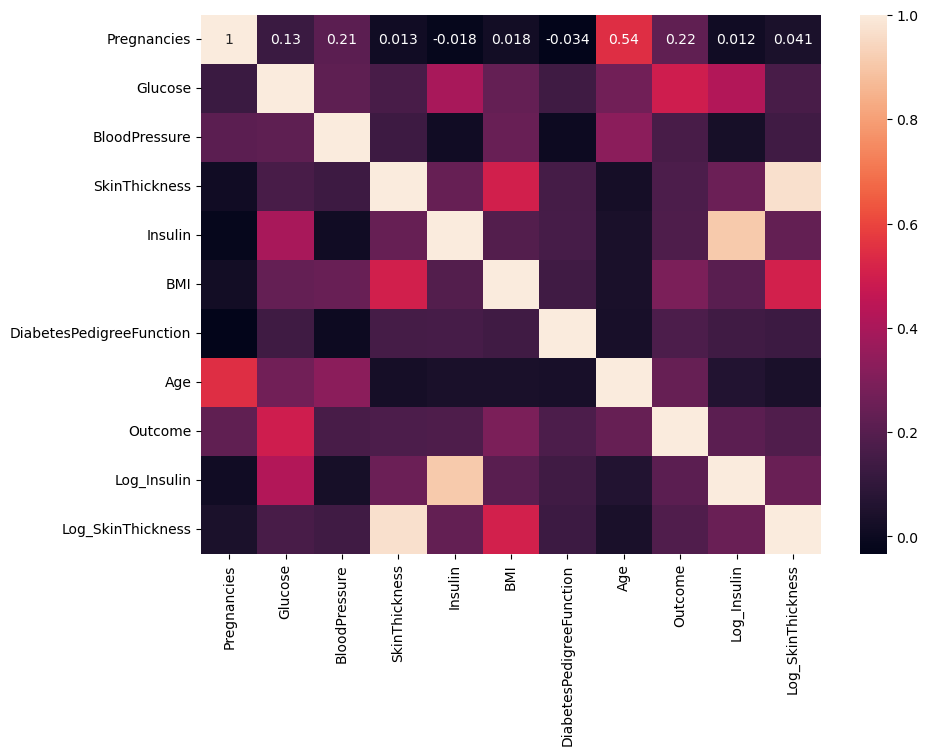

In [188]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)
plt.show()